<a href="https://colab.research.google.com/github/JunaidRaza78/RI-Software-Predictive-models/blob/main/Copy_of_Marketing_ROI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Marketing ROI Analysis**(Measure the return on investment for marketing campaigns. Allocate marketing budget to high-performing channels.)

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate mock data
num_campaigns = 5
num_months = 12

data = {
    'Campaign_ID': np.repeat(np.arange(1, num_campaigns + 1), num_months),
    'Month': np.tile(np.arange(1, num_months + 1), num_campaigns),
    'Marketing_Channel': np.tile(['Social Media', 'Email', 'Search', 'Display', 'Affiliate'], num_months),
    'Marketing_Expense': np.random.uniform(1000, 5000, size=num_campaigns * num_months),
    'Revenue': np.random.randint(5000, 20000, size=num_campaigns * num_months),
    #'Clicks': np.random.randint(100, 1000, size=num_campaigns * num_months),
    #'Impressions': np.random.randint(1000, 10000, size=num_campaigns * num_months),
    #'Conversion_Rate': np.random.uniform(0.01, 0.1, size=num_campaigns * num_months),
}

df = pd.DataFrame(data)

# Display the generated DataFrame
df


,Campaign_ID,Month,Marketing_Channel,Marketing_Expense,Revenue
0,1,1,Social Media,2498.160475,11863
1,1,2,Email,4802.857226,12916
2,1,3,Search,3927.975767,13529
3,1,4,Display,3394.633937,5878
4,1,5,Affiliate,1624.074562,14268
5,1,6,Social Media,1623.978081,9887
6,1,7,Email,1232.334449,17185
7,1,8,Search,4464.704583,19552
8,1,9,Display,3404.460047,9859
9,1,10,Affiliate,3832.290311,11331


**Calculating the Return on Investment**

ROI=((
Marketing_Expense
Revenue−Marketing_Expense
​
 ) / Marketing_Expense )×100

In [ ]:
def calculate_roi(df):
    """
    Calculate Return on Investment (ROI) for marketing campaigns.

    Parameters:
    - df: DataFrame containing marketing data with columns 'Marketing_Expense' and 'Revenue'.

    Returns:
    - DataFrame with additional 'ROI' column.
    """
    df['ROI %'] = (df['Revenue'] - df['Marketing_Expense']) / df['Marketing_Expense'] * 100
    df['ROI'] = (df['Revenue'] - df['Marketing_Expense'])
    df['CPA'] = (df['Marketing_Expense'] / df['Revenue']) * 100
    return df

# Example usage:
df_with_roi = calculate_roi(df)

# Display the DataFrame with ROI column
df_with_roi.head()


,Campaign_ID,Month,Marketing_Channel,Marketing_Expense,Revenue,ROI %,ROI,CPA
0,1,1,Social Media,2498.160475,11863,374.869414,9364.839525,21.058421
1,1,2,Email,4802.857226,12916,168.923255,8113.142774,37.185330
2,1,3,Search,3927.975767,13529,244.426768,9601.024233,29.033748
3,1,4,Display,3394.633937,5878,73.155636,2483.366063,57.751513
4,1,5,Affiliate,1624.074562,14268,778.531093,12643.925438,11.382636


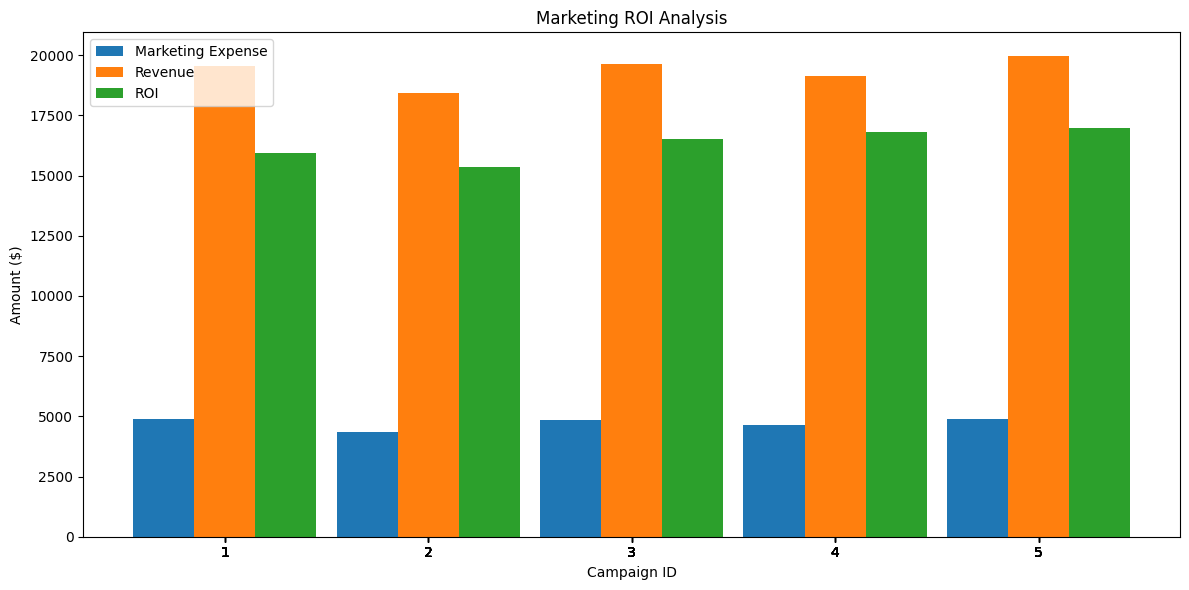

In [ ]:
import matplotlib.pyplot as plt

def visualize_roi(data):
    """
    Visualize Marketing_Expense, Revenue, and ROI for each campaign.

    Parameters:
    - data: DataFrame containing marketing data with columns 'Campaign_ID', 'Marketing_Expense', 'Revenue', and 'ROI'.
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # Bar width
    bar_width = 0.3

    # Plot Marketing_Expense
    ax.bar(data['Campaign_ID'] - bar_width, data['Marketing_Expense'], width=bar_width, label='Marketing Expense', align='center')

    # Plot Revenue
    ax.bar(data['Campaign_ID'], data['Revenue'], width=bar_width, label='Revenue', align='center')

    # Plot ROI
    ax.bar(data['Campaign_ID'] + bar_width, data['ROI'], width=bar_width, label='ROI', align='center')

    ax.set_xticks(data['Campaign_ID'])
    ax.set_xticklabels(data['Campaign_ID'])
    ax.set_xlabel('Campaign ID')
    ax.set_ylabel('Amount ($)')
    ax.set_title('Marketing ROI Analysis')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Visualize the data with ROI
visualize_roi(df_with_roi)


In [ ]:
# Dictionary with Marketing Expense
import pandas as pd

def marketing_performance_dict(df):
    """
    Generate a nested dictionary with marketing performance data for each campaign in the desired format.

    Parameters:
    - df: DataFrame containing mock data with columns 'Campaign_ID', 'Month', 'Marketing_Expense', 'Revenue %', 'ROI'

    Returns:
    - marketing_performance_dict: Nested dictionary with marketing performance data for each campaign
    """
    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')

    # Create a nested dictionary for marketing performance
    marketing_performance_dict = {}

    for campaign_id, data in df.groupby('Campaign_ID'):
        key = f'Campaign_ID_{campaign_id}_Marketing_Expense'
        marketing_performance_dict[key] = []

        for idx, row in data.iterrows():
            marketing_performance_dict[key].append({
                'label': row['Month'],
                'value': row['Marketing_Expense'],
            })

    return marketing_performance_dict


# Call the function
marketing_performance_dict = marketing_performance_dict(df_with_roi)

# Display the result
print(marketing_performance_dict)


{'Campaign_ID_1_Marketing_Performance': [{'Time': Timestamp('1900-01-01 00:00:00'), 'Marketing_Expense': 2498.16047538945, 'Revenue_Percentage': 11863, 'ROI': 9364.83952461055}, {'Time': Timestamp('1900-02-01 00:00:00'), 'Marketing_Expense': 4802.857225639665, 'Revenue_Percentage': 12916, 'ROI': 8113.142774360335}, {'Time': Timestamp('1900-03-01 00:00:00'), 'Marketing_Expense': 3927.9757672456203, 'Revenue_Percentage': 13529, 'ROI': 9601.02423275438}, {'Time': Timestamp('1900-04-01 00:00:00'), 'Marketing_Expense': 3394.6339367881465, 'Revenue_Percentage': 5878, 'ROI': 2483.3660632118535}, {'Time': Timestamp('1900-05-01 00:00:00'), 'Marketing_Expense': 1624.0745617697462, 'Revenue_Percentage': 14268, 'ROI': 12643.925438230253}, {'Time': Timestamp('1900-06-01 00:00:00'), 'Marketing_Expense': 1623.9780813448106, 'Revenue_Percentage': 9887, 'ROI': 8263.02191865519}, {'Time': Timestamp('1900-07-01 00:00:00'), 'Marketing_Expense': 1232.3344486727979, 'Revenue_Percentage': 17185, 'ROI': 15952

In [ ]:
# Dictionary with ROI
import pandas as pd

def marketing_performance_dict(df):
    """
    Generate a nested dictionary with marketing performance data for each campaign in the desired format.

    Parameters:
    - df: DataFrame containing mock data with columns 'Campaign_ID', 'Month', 'Marketing_Expense', 'Revenue %', 'ROI'

    Returns:
    - marketing_performance_dict: Nested dictionary with marketing performance data for each campaign
    """
    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')

    # Create a nested dictionary for marketing performance
    marketing_performance_dict = {}

    for campaign_id, data in df.groupby('Campaign_ID'):
        key = f'Campaign_ID_{campaign_id}_Revenue'
        marketing_performance_dict[key] = []

        for idx, row in data.iterrows():
            marketing_performance_dict[key].append({
                'label': row['Month'],
                'value': row['Revenue'],
            })

    return marketing_performance_dict


# Call the function
marketing_performance_dict = marketing_performance_dict(df_with_roi)

# Display the result
print(marketing_performance_dict)

{'Campaign_ID_1_Revenue': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 11863}, {'label': Timestamp('1900-02-01 00:00:00'), 'value': 12916}, {'label': Timestamp('1900-03-01 00:00:00'), 'value': 13529}, {'label': Timestamp('1900-04-01 00:00:00'), 'value': 5878}, {'label': Timestamp('1900-05-01 00:00:00'), 'value': 14268}, {'label': Timestamp('1900-06-01 00:00:00'), 'value': 9887}, {'label': Timestamp('1900-07-01 00:00:00'), 'value': 17185}, {'label': Timestamp('1900-08-01 00:00:00'), 'value': 19552}, {'label': Timestamp('1900-09-01 00:00:00'), 'value': 9859}, {'label': Timestamp('1900-10-01 00:00:00'), 'value': 11331}, {'label': Timestamp('1900-11-01 00:00:00'), 'value': 13571}, {'label': Timestamp('1900-12-01 00:00:00'), 'value': 13684}], 'Campaign_ID_2_Revenue': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 12208}, {'label': Timestamp('1900-02-01 00:00:00'), 'value': 10276}, {'label': Timestamp('1900-03-01 00:00:00'), 'value': 7062}, {'label': Timestamp('1900-04-01 00:

In [ ]:
# Dictionary with ROI
import pandas as pd

def marketing_performance_dict(df):
    """
    Generate a nested dictionary with marketing performance data for each campaign in the desired format.

    Parameters:
    - df: DataFrame containing mock data with columns 'Campaign_ID', 'Month', 'Marketing_Expense', 'Revenue %', 'ROI'

    Returns:
    - marketing_performance_dict: Nested dictionary with marketing performance data for each campaign
    """
    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')

    # Create a nested dictionary for marketing performance
    marketing_performance_dict = {}

    for campaign_id, data in df.groupby('Campaign_ID'):
        key = f'Campaign_ID_{campaign_id}_ROI'
        marketing_performance_dict[key] = []

        for idx, row in data.iterrows():
            marketing_performance_dict[key].append({
                'label': row['Month'],
                'value': row['ROI'],
            })

    return marketing_performance_dict


# Call the function
marketing_performance_dict = marketing_performance_dict(df_with_roi)

# Display the result
print(marketing_performance_dict)

{'Campaign_ID_1_ROI': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 9364.83952461055}, {'label': Timestamp('1900-02-01 00:00:00'), 'value': 8113.142774360335}, {'label': Timestamp('1900-03-01 00:00:00'), 'value': 9601.02423275438}, {'label': Timestamp('1900-04-01 00:00:00'), 'value': 2483.3660632118535}, {'label': Timestamp('1900-05-01 00:00:00'), 'value': 12643.925438230253}, {'label': Timestamp('1900-06-01 00:00:00'), 'value': 8263.02191865519}, {'label': Timestamp('1900-07-01 00:00:00'), 'value': 15952.665551327202}, {'label': Timestamp('1900-08-01 00:00:00'), 'value': 15087.295416900259}, {'label': Timestamp('1900-09-01 00:00:00'), 'value': 6454.539953027164}, {'label': Timestamp('1900-10-01 00:00:00'), 'value': 7498.709688815818}, {'label': Timestamp('1900-11-01 00:00:00'), 'value': 12488.66202281679}, {'label': Timestamp('1900-12-01 00:00:00'), 'value': 8804.360591352022}], 'Campaign_ID_2_ROI': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 7878.229436798313}, {'la

In [ ]:
# Define weights for each metric
roi_weight = 0.5
cpa_weight = 0.5

# Calculate the performance score using equal weights
df['Performance_Score'] = roi_weight * df['ROI'] + cpa_weight * (1 / df['CPA'])

# Display the results
df


,Campaign_ID,Month,Marketing_Channel,Marketing_Expense,Revenue,ROI %,ROI,CPA,Performance_Score
0,1,1,Social Media,2498.160475,11863,374.869414,9364.839525,21.058421,4682.443506
1,1,2,Email,4802.857226,12916,168.923255,8113.142774,37.185330,4056.584833
2,1,3,Search,3927.975767,13529,244.426768,9601.024233,29.033748,4800.529338
3,1,4,Display,3394.633937,5878,73.155636,2483.366063,57.751513,1241.691689
4,1,5,Affiliate,1624.074562,14268,778.531093,12643.925438,11.382636,6322.006646
5,1,6,Social Media,1623.978081,9887,508.813636,8263.021919,16.425388,4131.541400
6,1,7,Email,1232.334449,17185,1294.507799,15952.665551,7.170989,7976.402501
7,1,8,Search,4464.704583,19552,337.923711,15087.295417,22.835028,7543.669605
8,1,9,Display,3404.460047,9859,189.590709,6454.539953,34.531495,3227.284456
9,1,10,Affiliate,3832.290311,11331,195.671754,7498.709689,33.821289,3749.369628


In [ ]:
def rank_marketing_channels(data):
    """
    Rank marketing channels based on the sum of their performance scores.

    Parameters:
    - data: DataFrame containing marketing data with columns 'Marketing_Channel' and 'Performance_Score'.

    Returns:
    - ranked_channels: DataFrame with 'Marketing_Channel' and 'Total_Performance_Score' columns, ranked in descending order.
    """
    # Sum the performance scores for each channel
    total_scores = data.groupby('Marketing_Channel')['Performance_Score'].sum().reset_index()

    # Rank the channels based on the total performance score in descending order
    ranked_channels = total_scores.sort_values(by='Performance_Score', ascending=False).reset_index(drop=True)

    return ranked_channels

ranked_channels_result = rank_marketing_channels(df[['Marketing_Channel', 'Performance_Score']])
print(ranked_channels_result)


  Marketing_Channel  Performance_Score
0      Social Media       74702.344049
1             Email       59262.320676
2           Display       58873.706786
3            Search       58616.006770
4         Affiliate       54670.691305


In [ ]:
def allocate_budget(data, budget):
    """
    Allocate marketing budget to high-performing channels based on their performance scores.

    Parameters:
    - data: DataFrame containing marketing data with columns 'Marketing_Channel' and 'Performance_Score'.
    - budget: Total marketing budget.

    Returns:
    - budget_allocation: DataFrame with 'Marketing_Channel', 'Performance_Score', and 'Budget_Allocation' columns.
    """
    # Rank marketing channels
    ranked_channels = rank_marketing_channels(data)

    # Calculate the proportion of budget allocation based on performance scores
    ranked_channels['Budget_Allocation'] = (ranked_channels['Performance_Score'] / ranked_channels['Performance_Score'].sum()) * budget

    return ranked_channels

# Example usage:
# Assuming df contains 'Marketing_Channel' and 'Performance_Score' columns
budget_allocation_result = allocate_budget(df[['Marketing_Channel', 'Performance_Score']], budget=100000)
print(budget_allocation_result)


  Marketing_Channel  Performance_Score  Budget_Allocation
0      Social Media       74702.344049       24402.556821
1             Email       59262.320676       19358.859030
2           Display       58873.706786       19231.912912
3            Search       58616.006770       19147.731628
4         Affiliate       54670.691305       17858.939609
